![SegmentLocal](../../assets/images/Logo2.png)

# Parametric and Non-Parametric Analysis 

*ACC online course, Institute of Cognitive Science, University of Osnabrueck* 

## Prerequisites
For this chapter, you should be familiar with the following concepts and techniques:
* Basic Python programming
* Working with Pandas & NumPy
* Knowledge of Descriptive Statistics
* Statistical plotting

# Scope

In this tutorial, you will learn:
- how to simulate experimental data based on some statistical properties
- how to test difference between means using t-tests
- how to test differences between means between means in a 2x2 experimental design using ANOVA
- how to formulate linear models and how to interpret the model coefficients
- and, how to perform non-parametric permutation tests

with this information, you should be able to start beginner level analysis in your thesis and other projects in teh future.

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Simulate data

In this section, you are require to create a data set of 1 category with two levels. There are two types of people, a `smokers` and `non-smokers` diet. We want to simulate the amount of carbon monoxide in the lungs of 100 volunteers in each group.

Your task is to simulate the data of the amount of CO in the lungs of `smokers` (mean = 10, SD=3.5) in `non-smokers` (mean=2.5, SD=1.8)

In [73]:
data = {
    'is_smoker':np.concatenate([['Yes']*100, ['No']*100]),
    'CO_level':np.concatenate([np.random.normal(10, 3.5, 100), np.random.normal(2.5, 1.8, 100)]),
}
sim_df = pd.DataFrame.from_dict(data)

sim_df.head()

,is_smoker,CO_level
0,Yes,10.105437
1,Yes,10.502287
2,Yes,12.547213
3,Yes,6.595912
4,Yes,7.594324


Now that you have simulated the data, calculate the overall average `CO_level` found in the lungs. Also, calculate the mean and std of the `CO_level` per category of `is_smoker`. 

In [74]:
display(sim_df.CO_level.agg(['mean', 'std']))

display(sim_df.groupby(['is_smoker']).CO_level.agg(['mean', 'std']))

mean    6.505697
std     4.821182
Name: CO_level, dtype: float64

,mean,std
is_smoker,,
No,2.522038,1.809126
Yes,10.489356,3.374873


Using a [sns.pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html), plot the mean and 95\% CI of the `CO_level` in smokers and non-smokers. Checkout [sns.despine()](https://seaborn.pydata.org/generated/seaborn.despine.html) and [sns.set()](https://seaborn.pydata.org/generated/seaborn.set.html) to create a different style of pointplot than you have made before.

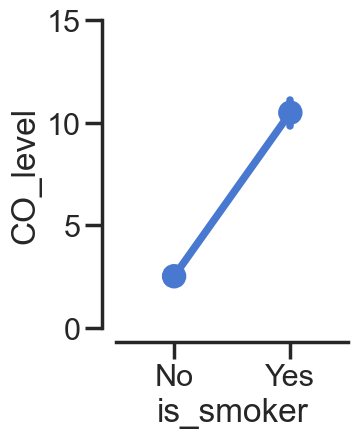

In [86]:
sns.set(context='poster', palette='muted', style='ticks')
fig, ax =plt.subplots(figsize=(3,4))
ax = sns.pointplot(
    data=sim_df,
    y='CO_level',
    x='is_smoker',
    order=['No', 'Yes'],
    errorbar=('ci', 95),
    dodge=True,
    ax=ax
)

ax.set(ylim=(0, 15))
sns.despine(offset=10)

## Parametric Methods of Testing Differences in Means

### Using T-tests

Using [ttest_ind()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function of scipy, calculate the t-statistic and p-value of difference between the means of `CO-level` in smokers and non-smokers

In [89]:
a = sim_df.query('is_smoker == "Yes"').CO_level
b = sim_df.query('is_smoker == "No"').CO_level


print(f'Ttest result: {scipy.stats.ttest_ind(a, b)}')

Ttest result: Ttest_indResult(statistic=20.806789040034236, pvalue=1.0141093702268962e-51)


<div class="alert alert-block alert-warning">
<b>Think!</b>  
<br>
What does the t-statistic and the p-value convey here? Please write in words below. 
 <br>   
 <i>If you had to report the results in a research paper, how would you report it in APA format?</i>
</div>

### Using ANOVA

Using [OLS()](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS) and [anova_lm()](https://www.statsmodels.org/stable/anova.html)function of `statsmodels`, calculate the F-statistic and p-value of difference between the means of `CO-level` in smokers and non-smokers

In [91]:
lm = ols('CO_level ~ 1 + C(is_smoker, Sum)', data=sim_df).fit()
summary = sm.stats.anova_lm(lm, typ=2)
display(summary.round(3))

,sum_sq,df,F,PR(>F)
"C(is_smoker, Sum)",3173.908,1.0,432.922,0.0
Residual,1451.608,198.0,NaN,NaN


<div class="alert alert-block alert-warning">
<b>Think!</b>  
<br>
What does the F-statistic and the p-value convey here?
<br>   
<i>If you had to report the results in a research paper, how would you report it in APA format?</i>
</div>

### Using Ordinary Least Squares

Now checkout the coefficients of the linear model using `lm.summary()` function.

In [92]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CO_level   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     432.9
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.01e-51
Time:                        12:23:00   Log-Likelihood:                -482.00
No. Observations:                 200   AIC:                             968.0
Df Residuals:                     198   BIC:                             974.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.5057      0.191     33.979      0.000       6.128       6.883
C(is_smoker, Sum)[S.No]    -3.9837      0.191    -20.807      0.000      -4.361      -3.606
==============================================================================
Omnibus:                       12.962   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               24.183
Skew:                           0.300   Prob(JB):                     5.61e-06
Kurtosis:                       4.594   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">
<b>Think!</b>  
<br>
What do the coefficients convey here? Compare the coefficients of the intercept and the is_smoker factor to the mean values you calculated before. What does that tell you?
</div>

## Non-Parametric Methods of Testing Difference in Means

In this section, we will use [Permutation Tests](https://en.wikipedia.org/wiki/Permutation_test) to test the hypothesis if there is a difference between the `CO_level` in the lungs of smokers vs. non-smokers.

$H_0$: there is no difference between the `CO-level` of smoker vs. non-smokers.
<br><br>
$H_1$: these is a significant difference between the `CO_level` of smokers vs. non-smokers

As shown in the demo, calculate the actual difference in the mean value of `CO_level` between smokers and non-smokers.

In [95]:
mean_diff = (
    sim_df.query('is_smoker=="Yes"').CO_level.mean() 
    - sim_df.query('is_smoker=="No"').CO_level.mean()
)

print(f'Diff in means of CO_levels of smokers vs. non-smokers: {np.round(mean_diff, 3)}')

Diff in means of CO_levels of smokers vs. non-smokers: 7.967


Now, write a function that computes a distribution of _pseudo differences_ with the values of `CO_level` permuted between smokers and non-smokers.

In [96]:
def permute_values(N=1000):
    pseudo_diff = []

    for _ in range(N):
        sim_df['pseudo_colevel'] = np.random.permutation(sim_df.CO_level)
        
        diff = (
            sim_df.query('is_smoker=="Yes"').pseudo_colevel.mean() 
            - sim_df.query('is_smoker=="No"').pseudo_colevel.mean()
        )
        pseudo_diff.append(diff)
        
        
    return np.array(pseudo_diff)

smoker_pseudo_diff = permute_values()

Now that you have computed the pseudo differences, calculate the **area under the curve (AUC)** of the values that are greater than or less than the actual difference. Take the minimum of the two AUC. This number will represent the p-value.

In [98]:
p_value = np.min([
    [np.mean(smoker_pseudo_diff > mean_diff), np.mean(smoker_pseudo_diff < mean_diff)]
])

Now plot the distribution of the pseudo differences between smokers. Additionally, draw the value of the actual difference between smoker vs. non-smokers derived from your data.

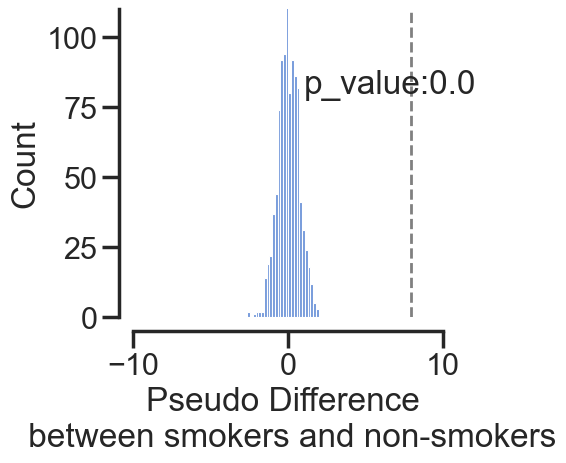

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(4,4), sharex=True, sharey=True)

ax = sns.histplot(data=smoker_pseudo_diff, color='b', ax=ax)
ax.axvline(mean_diff, color='grey', lw=2, ls='--')
ax.set(
    ylim=(0,110),
    xlim=(-10, 10),
    xlabel='Pseudo Difference \n between smokers and non-smokers'
)
ax.text(1, 80, f'p_value:{p_value}')
sns.despine(offset=10)

<div class="alert alert-block alert-warning">
<b>Think!</b>  
<br>
Can you reject the null hypothesis? Why?
</div>

# BONUS!!!

Now that you know how to do hypothesis testing with parametric and non-parametric methods, simulate a dataset with 2x2 experimental design and try the above methods you used above.

Refer to the demo notebook from today if you need help.

Have fun!